In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/down_data.csv")
data.shape

(61, 3)

In [12]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(60):
    x1.append(x[i]*0.1) # 2차함수 0.1(down)
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001(down)
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [13]:
hypothesis=B+X1*W1+X2*W2
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000005) # 2차 함수 :0.000000005(down)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
for step in range(30000): # 35000번
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1,X2:x2, Y:y1})
    if step % 10000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  288605100.0 
Prediction:
 [38491.758   36709.266   35294.64    34206.848   33156.32    32141.582
 29297.787   29751.84    29073.623   27980.56    26524.96    24400.824
 24586.127   23496.535   22123.355   21469.082   20070.541   19049.174
 17947.99    16787.654   15821.065   14801.261   14054.32    12860.787
 12211.747   11256.568   10451.849    9848.432    9348.053    8546.045
  7868.2314   7186.0986   6558.7305   5889.915    5282.792    4769.1387
  4265.004    3776.0796   3335.1172   2887.566    2511.9175   2117.1401
  1789.0386   1515.7516   1274.3854   1085.3989    981.9235    970.8661
   938.19653   916.8354    906.2838    906.2838    895.81244   895.81244
   885.42114   885.42114   864.8843    875.1095    875.1095    875.1095 ] 
W1:[1.6776628],B:[-1.2888958]
10000 Cost:  6.502767 
Prediction:
 [2.1974354 2.7510033 3.176653  3.4952335 3.7953148 4.0777664 4.8274326
 4.7121143 4.883724  5.151903  5.4919853 5.9501705 5.912121  6.130253
 6.384989  6.4978952 6.7194157 6.862812

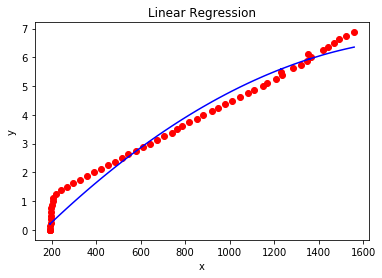

In [15]:
# W1:[0.00108227],B:[1.1958917]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1)+x2*sess.run(W2), 'b')
# X=5 일때의 계산 값
plt.show()